In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

### Q-1: Using Gapminder Data
### Create a scatter plot of 'gdpPercap' against 'lifeExp' for the year 2007, with the size of the markers determined by 'pop' and the color determined by 'continent'.

In [2]:
import plotly.express as px

In [4]:
gap = px.data.gapminder()
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


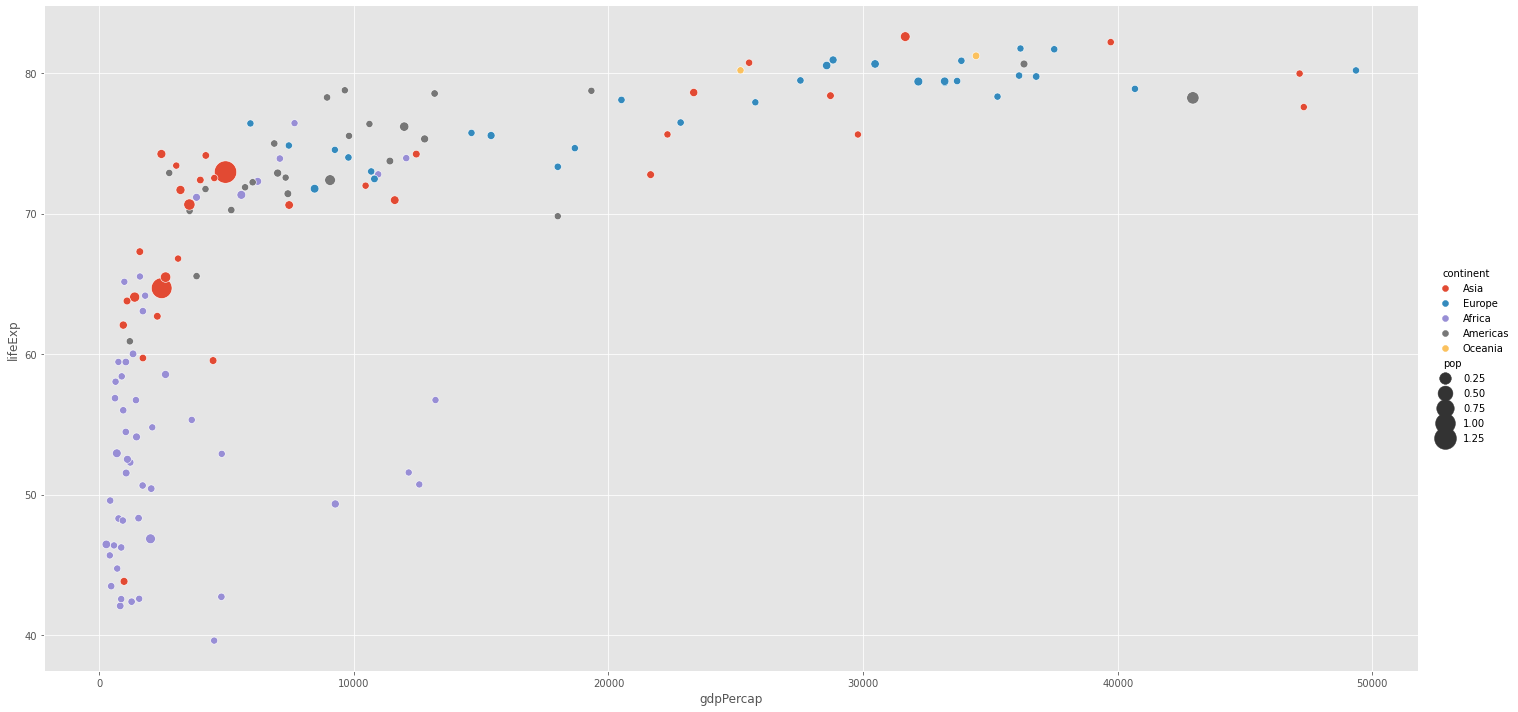

In [19]:
temp_df = gap.query("year == 2007")
sns.relplot(data=temp_df,x="gdpPercap",y="lifeExp",size="pop",sizes=(50,500),kind="scatter",hue="continent",height=10,aspect=2)

### Q-2-3: Using flights dataset of seaborn.
### Q 2. Using the "flights" dataset that comes with seaborn, create a heatmap that shows the average number of passengers per month for each year.

In [20]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot: xlabel='month', ylabel='year'>

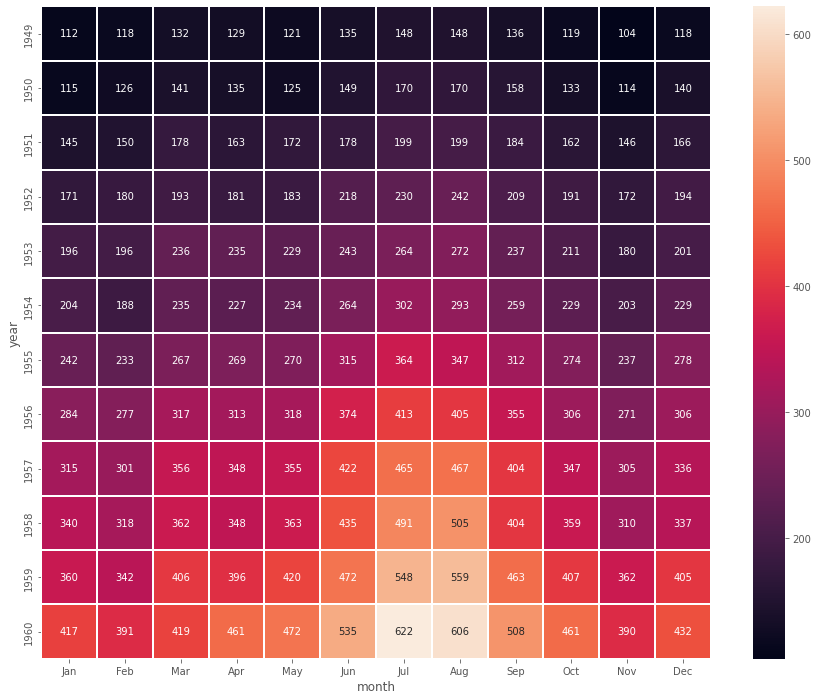

In [34]:
plt.figure(figsize=(15,12))
matrix = flights.pivot_table(index="year",columns="month",values="passengers",aggfunc="mean")
sns.heatmap(matrix,annot=True,linewidth=0.2,fmt="g")

### Q 3.Using the seaborn's flight dataset, create a clustermap to visualize the relationship between the number of passengers, months, and year.

<Figure size 1080x864 with 0 Axes>

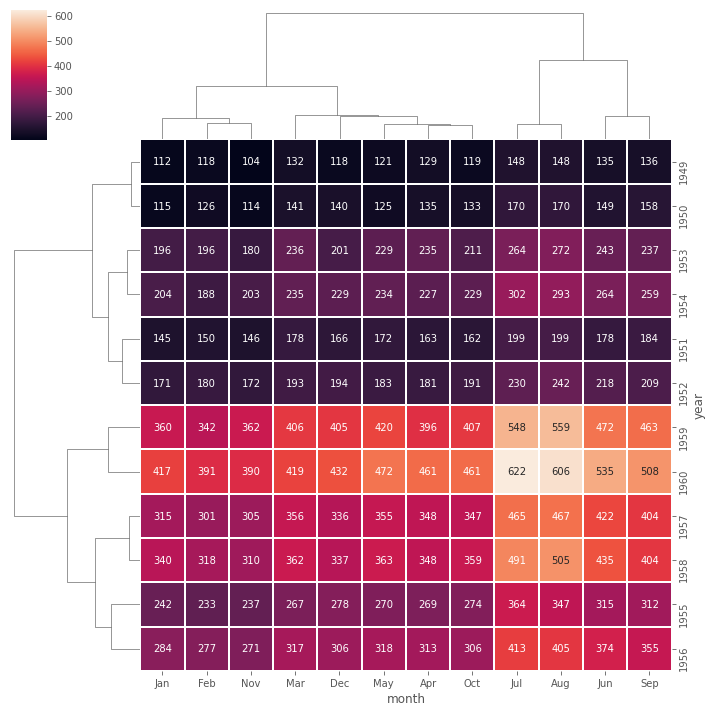

In [37]:
plt.figure(figsize=(15,12))
matrix = flights.pivot_table(index="year",columns="month",values="passengers",aggfunc="mean")
sns.clustermap(matrix,annot=True,linewidth=0.2,fmt="g")

### For questions 4-8:
##### For these qestions, an insurance dataset is used. You can get details from here. And if you want this dataset to use directly, then you can use this link: https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv

### Q-4: Draw a scatter plot based on the below conditions:
- x-axis should be "age" and y-axis should be "bmi".
- For hue, size and style parameters use "diabetic", "gender" and "smoker" column respectively.
- Add title to your chart.
- Age should be less than 70 percentiles.
- BMI should be greater than the average value of the filtered age dataset

In [41]:
insurance = pd.read_csv(r"D:\Jupyter\insurance_data - insurance_data.csv").drop("index",axis=1)
insurance.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [57]:
temp_df = insurance[insurance["age"] < insurance["age"].quantile(0.70)]
temp_df = temp_df[temp_df["bmi"] > temp_df["bmi"].mean()]
temp_df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
16,17,35.0,male,34.1,90,No,0,No,southwest,1261.44
17,18,41.0,male,34.4,84,No,0,No,southwest,1261.86


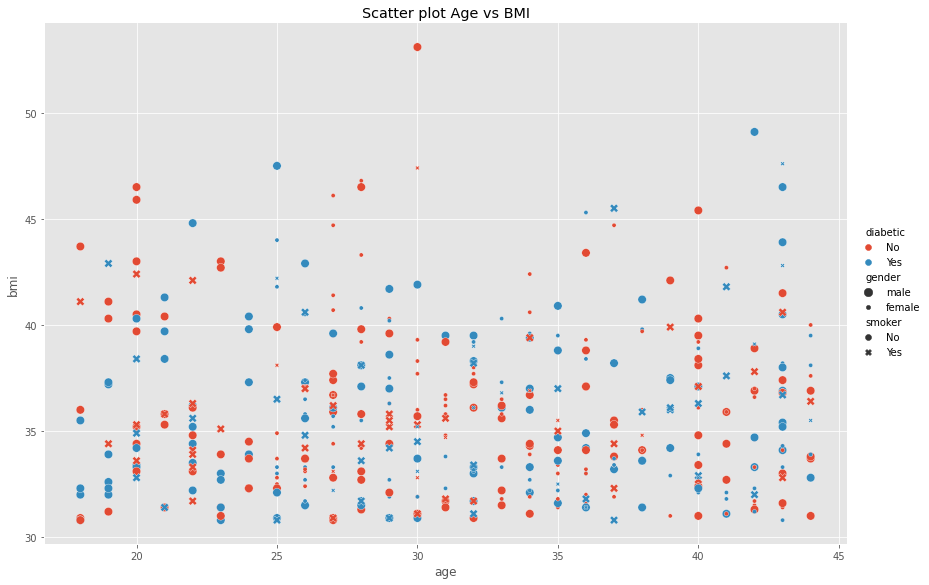

In [69]:
sns.relplot(data=temp_df,x="age",y="bmi",hue="diabetic",size="gender",style="smoker",height=8,aspect=1.5)
plt.title("Scatter plot Age vs BMI")
plt.show()

### Q-5: Draw a line plot by using the below informations
- bloodpressure vs children
- Blood-pressure values should be between 90 and 100. The upper and lower limit are included.
- Show the details of "smoker".

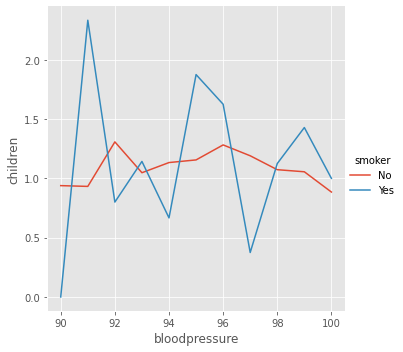

In [83]:
temp_df = insurance[(insurance["bloodpressure"] >= 90)&(insurance["bloodpressure"] <= 100)]
sns.relplot(data=temp_df,x="bloodpressure",y="children",kind="line",hue="smoker",err_style=None)

### Q-6: Draw a histogram using displot
- based on "age" column.
- Show details of "smoker" (hue).
- Create 2 separate charts for the above 2 conditions based on "gender" side-by-side.

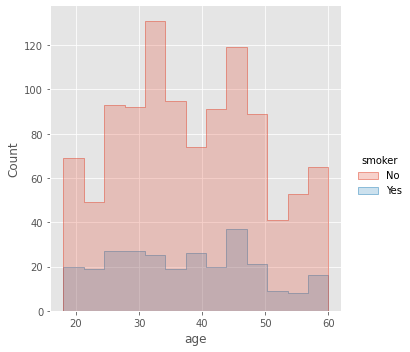

In [87]:
sns.displot(data=insurance,x="age",kind="hist",hue="smoker",element="step")

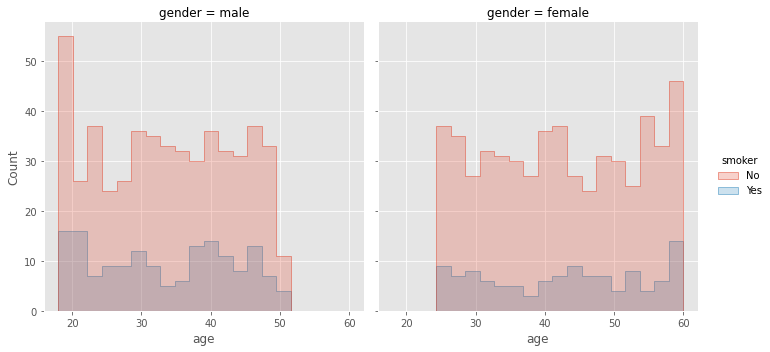

In [91]:
sns.displot(data=insurance,x="age",kind="hist",hue="smoker",element="step",col="gender",bins=20)

### Q-7: Draw a kde plot between "age" and "bloodpressure".

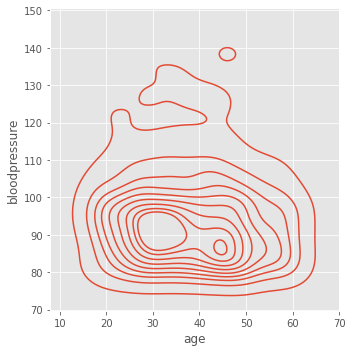

In [92]:
sns.displot(data=insurance,x="age",y="bloodpressure",kind="kde")

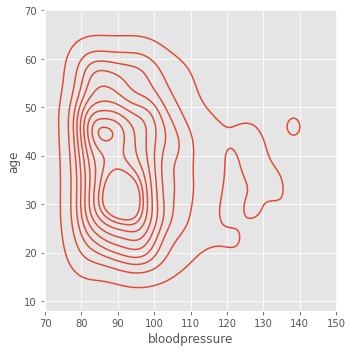

In [93]:
sns.displot(data=insurance,x="bloodpressure",y="age",kind="kde")

### Q-8: Draw a clustermap between between "age", "bmi" and "bloodpressure".

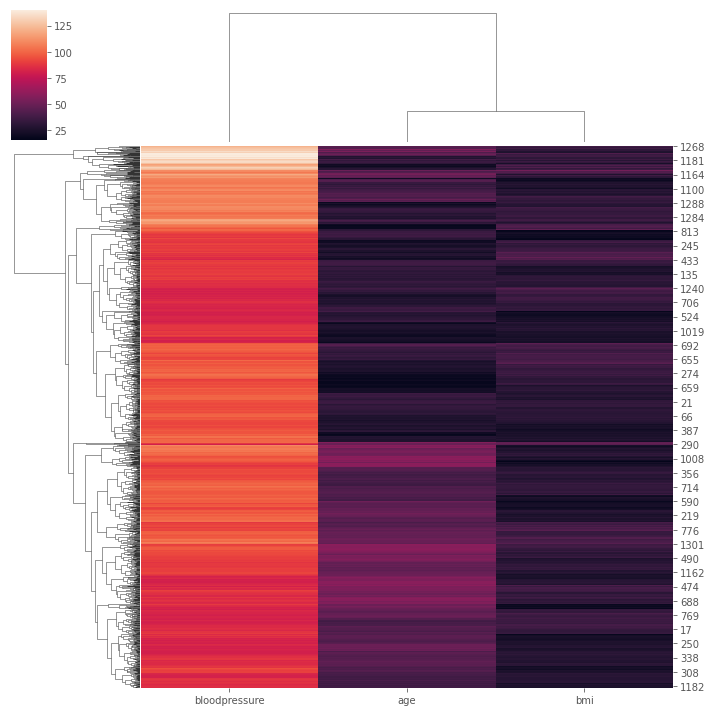

In [96]:
sns.clustermap(insurance[["age","bmi","bloodpressure"]].dropna())